In [ ]:
import pandas as pd

**Importing Dataset**

In [ ]:
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")

<ipython-input-3-2beeab8dff7a>:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")


In [ ]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


# **PREPROCESSING**







In [ ]:
df.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], axis=1, inplace=True)

**Shape**

In [ ]:
df.shape

(1048575, 21)

**Columns**

In [ ]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

**Data Types**

In [ ]:
print(df.dtypes)

item_id                  float64
status                    object
created_at                object
sku                       object
price                    float64
qty_ordered              float64
grand_total              float64
increment_id              object
category_name_1           object
sales_commission_code     object
discount_amount          float64
payment_method            object
Working Date              object
BI Status                 object
 MV                       object
Year                     float64
Month                    float64
Customer Since            object
M-Y                       object
FY                        object
Customer ID              float64
dtype: object


**Null values**

In [ ]:
df.isnull().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601229
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

**Replacing Null with mean** (Numerical)

In [ ]:
# Replace missing values in numerical columns with mean (rounded down)
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col].fillna(int(mean_value), inplace=True)

**Replacing Null with mode**(Categorical)

In [ ]:
# Replace missing values in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

**Removing Outliers (IQR)**

In [ ]:
def replace_outliers_with_mean(column):
    mean_value = column.mean()
    std_dev = column.std()
    lower_bound = mean_value - 3 * std_dev  # Lower bound of outliers (3 standard deviations away from the mean)
    upper_bound = mean_value + 3 * std_dev  # Upper bound of outliers (3 standard deviations away from the mean)
    column = column.apply(lambda x: x if lower_bound <= x <= upper_bound else mean_value)
    return column

# Replace outliers with mean for numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
for col in numerical_cols:
    df[col] = replace_outliers_with_mean(df[col])

**Formatting Date**

In [ ]:
# Assuming 'Working D' is the name of the column with the date in the format 'month/day/year'
# Convert 'Working D' to datetime format
df['Working Date'] = pd.to_datetime(df['Working Date'], format='%m/%d/%Y')

# Extract day and create a new integer column 'day'
df['Day'] = df['Working Date'].dt.day



In [ ]:
df.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Day
1048570,565667.0,complete,11/25/2016,MATSAM59DB75ADB2F80,6348.0,1.0,8530.0,100266667,Mobiles & Tablets,\N,...,2016-11-25,Net,999,2017.0,7.0,2016-11,11-2017,FY18,45790.0,25
1048571,565667.0,complete,11/25/2016,MATSAM59DB75ADB2F80,6348.0,1.0,8530.0,100266667,Mobiles & Tablets,\N,...,2016-11-25,Net,999,2017.0,7.0,2016-11,11-2017,FY18,45790.0,25
1048572,565667.0,complete,11/25/2016,MATSAM59DB75ADB2F80,6348.0,1.0,8530.0,100266667,Mobiles & Tablets,\N,...,2016-11-25,Net,999,2017.0,7.0,2016-11,11-2017,FY18,45790.0,25
1048573,565667.0,complete,11/25/2016,MATSAM59DB75ADB2F80,6348.0,1.0,8530.0,100266667,Mobiles & Tablets,\N,...,2016-11-25,Net,999,2017.0,7.0,2016-11,11-2017,FY18,45790.0,25
1048574,565667.0,complete,11/25/2016,MATSAM59DB75ADB2F80,6348.0,1.0,8530.0,100266667,Mobiles & Tablets,\N,...,2016-11-25,Net,999,2017.0,7.0,2016-11,11-2017,FY18,45790.0,25


#**Visualization 📊**


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

**Bar Chart**

In [ ]:
fig = px.bar(df['status'].value_counts(), x=df['status'].value_counts().index, y=df['status'].value_counts().values,
             labels={'x': 'Status', 'y': 'Count'}, title='Interactive Bar Chart: Distribution of Status')
fig.show()

**Histogram**

In [ ]:
# Create an interactive histogram with Plotly
fig = px.histogram(df, x='price', nbins=10, title='Interactive Histogram: Distribution of Price')
fig.update_layout(
    xaxis_title='Price',
    yaxis_title='Frequency',
)
fig.show()

**Line Graph📈**

In [ ]:
df_grouped = df.groupby('Year').size().reset_index(name='count')

# Create an interactive line plot with Plotly
fig = px.line(df_grouped, x='Year', y='count', title='Interactive Line Plot: Number of Items Created Over Time')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Items',
)
fig.show()

**Box Plot**

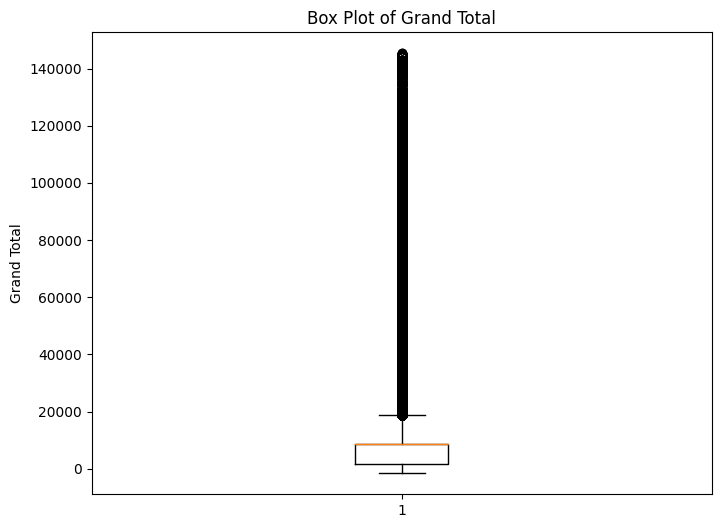

In [ ]:
# Example for 'grand_total' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['grand_total'])
plt.title('Box Plot of Grand Total')
plt.ylabel('Grand Total')
plt.show()


**Scater Plot**

In [ ]:

fig = px.scatter(df, x='qty_ordered', y='price', title='Interactive Scatter Plot: Quantity vs. Price')
fig.update_traces(marker=dict(size=12, opacity=0.6), selector=dict(mode='markers'))
fig.update_layout(
    xaxis_title='Quantity',
    yaxis_title='Price',
    hovermode='closest'
)
fig.show()


In [ ]:

fig = px.scatter(df, x='discount_amount', y='price', title='Interactive Scatter Plot: Price vs. Discount')
fig.update_traces(marker=dict(size=12, opacity=0.6), selector=dict(mode='markers'))
fig.update_layout(
    xaxis_title='Discount',
    yaxis_title='Price',
    hovermode='closest'
)
fig.show()

#**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

df['Payment_method_encoded'] = label_encoder.fit_transform(df['payment_method'])

Payment_method_mapping= dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Encode 'category_name_1' column
df['category_name_1_encoded'] = label_encoder.fit_transform(df['category_name_1'])

# Create a mapping dictionary for 'category_name_1'
category_name_1_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Encode 'status' column
df['status_encoded'] = label_encoder.fit_transform(df['status'])

# Create a mapping dictionary for 'status'
status_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping dictionaries
print("Mapping for 'Payment method' column:")
print(Payment_method_mapping)

print("\nMapping for 'category_name_1' column:")
print(category_name_1_mapping)

print("\nMapping for 'status' column:")
print(status_mapping)

Mapping for 'Payment method' column:
{'Easypay': 0, 'Easypay_MA': 1, 'Payaxis': 2, 'apg': 3, 'bankalfalah': 4, 'cashatdoorstep': 5, 'cod': 6, 'customercredit': 7, 'easypay_voucher': 8, 'financesettlement': 9, 'internetbanking': 10, 'jazzvoucher': 11, 'jazzwallet': 12, 'marketingexpense': 13, 'mcblite': 14, 'mygateway': 15, 'productcredit': 16, 'ublcreditcard': 17}

Mapping for 'category_name_1' column:
{'Appliances': 0, 'Beauty & Grooming': 1, 'Books': 2, 'Computing': 3, 'Entertainment': 4, 'Health & Sports': 5, 'Home & Living': 6, 'Kids & Baby': 7, "Men's Fashion": 8, 'Mobiles & Tablets': 9, 'Others': 10, 'School & Education': 11, 'Soghaat': 12, 'Superstore': 13, "Women's Fashion": 14, '\\N': 15}

Mapping for 'status' column:
{'\\N': 0, 'canceled': 1, 'closed': 2, 'cod': 3, 'complete': 4, 'exchange': 5, 'fraud': 6, 'holded': 7, 'order_refunded': 8, 'paid': 9, 'payment_review': 10, 'pending': 11, 'pending_paypal': 12, 'processing': 13, 'received': 14, 'refund': 15}


In [ ]:
# Display the DataFrame with encoded columns
print("\nDataFrame with encoded columns:")
print(df[['category_name_1', 'category_name_1_encoded', 'status', 'status_encoded',"payment_method","Payment_method_encoded"]].head())


DataFrame with encoded columns:
     category_name_1  category_name_1_encoded          status  status_encoded  \
0    Women's Fashion                       14        complete               4   
1  Beauty & Grooming                        1        canceled               1   
2    Women's Fashion                       14        canceled               1   
3  Beauty & Grooming                        1        complete               4   
4            Soghaat                       12  order_refunded               8   

  payment_method  Payment_method_encoded  
0            cod                       6  
1            cod                       6  
2            cod                       6  
3            cod                       6  
4            cod                       6  


#**Correlation**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

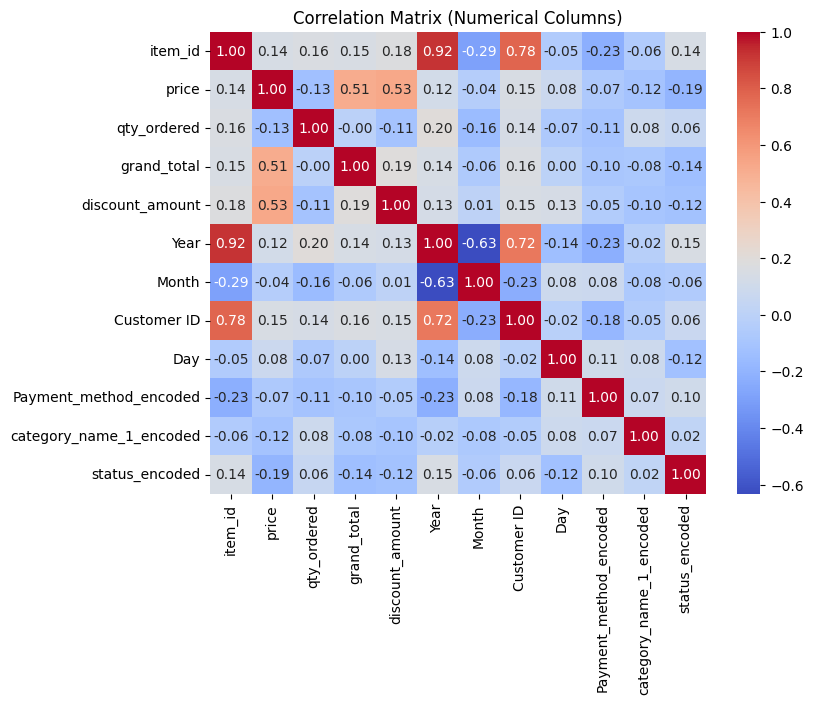

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df_numerical = df[numerical_columns]

# Calculate correlation matrix for numerical columns
correlation_matrix = df_numerical.corr()

# Plot correlation matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

**Dropping Highly correlated Columns**

In [ ]:
correlation_matrix = df_numerical.corr()

# Find columns to drop based on correlation threshold and their related columns
to_drop = []
related_columns = {}
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            if col1 not in to_drop:
                to_drop.append(col1)
                related_columns[col1] = [col2]
            else:
                related_columns[col1].append(col2)

# Drop columns with correlation higher than 0.7
df_new = df.drop(to_drop, axis=1)

# Output the names of dropped columns and their related columns
print("\nDropped Columns and Their Related Columns:")
for col in to_drop:
    print(f"{col}: {', '.join(related_columns[col]) if col in related_columns else 'No related columns'}")

# Output the names of columns left
print("\nColumns Left:")
print(df_new.columns.to_list())


Dropped Columns and Their Related Columns:
item_id: Year

Columns Left:
['status', 'created_at', 'sku', 'price', 'qty_ordered', 'grand_total', 'increment_id', 'category_name_1', 'sales_commission_code', 'discount_amount', 'payment_method', 'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Customer ID', 'Day', 'Payment_method_encoded', 'category_name_1_encoded', 'status_encoded']


**More processing**

In [ ]:
print(df_new.shape)
df_new = df_new.drop(["status","sku","M-Y", "created_at", "category_name_1", "payment_method", "BI Status", "FY", "Customer Since"], axis=1)
print(df_new.shape)

(1048575, 24)
(1048575, 15)


In [ ]:
df_new = df_new.drop(["sales_commission_code","Working Date"],axis=1)

In [ ]:
# df_new = df_new.drop(["increment_id"],axis=1)

In [ ]:
df_new.head()

,price,qty_ordered,grand_total,increment_id,discount_amount,MV,Year,Month,Customer ID,Day,Payment_method_encoded,category_name_1_encoded,status_encoded
0,1950.0,1.0,1950.0,100147443,0.0,"1,950",2016.0,7.0,1.0,1,6,14,4
1,240.0,1.0,240.0,100147444,0.0,240,2016.0,7.0,2.0,1,6,1,1
2,2450.0,1.0,2450.0,100147445,0.0,"2,450",2016.0,7.0,3.0,1,6,14,1
3,360.0,1.0,60.0,100147446,300.0,360,2016.0,7.0,4.0,1,6,1,4
4,555.0,2.0,1110.0,100147447,0.0,"1,110",2016.0,7.0,5.0,1,6,12,8


In [ ]:
print(df_new.columns)
print(df_new.dtypes)


Index(['price', 'qty_ordered', 'grand_total', 'increment_id',
       'discount_amount', ' MV ', 'Year', 'Month', 'Customer ID', 'Day',
       'Payment_method_encoded', 'category_name_1_encoded', 'status_encoded'],
      dtype='object')
price                      float64
qty_ordered                float64
grand_total                float64
increment_id                object
discount_amount            float64
 MV                         object
Year                       float64
Month                      float64
Customer ID                float64
Day                          int32
Payment_method_encoded       int64
category_name_1_encoded      int64
status_encoded               int64
dtype: object


In [ ]:
df_new[' MV '] = df_new[' MV '].str.replace(',', '').str.strip()
df_new[' MV '] = pd.to_numeric(df_new[' MV '], errors='coerce')

# Convert NaN values to 0 (or any default value as needed)
df_new[' MV '] = df_new[' MV '].fillna(0).astype(int)

#**Regression Algos**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**X and Y**

In [ ]:
X = df_new[['qty_ordered', 'grand_total',"discount_amount"," MV ","Month","Customer ID","Day","category_name_1_encoded","status_encoded","Payment_method_encoded"]].values
y = df_new['price'].values


In [ ]:
# Number of folds for cross-validation
k = 20

# Initialize KFold with k splits
kf = KFold(n_splits=k)

# Lists to store MSE values and models for each fold
mse_values = []
models = []

**MultiLinear Regression**

In [ ]:
# Perform k-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print(f"MSE for fold {fold}: {mse}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print()

    # Store the trained model for later use
    models.append(model)

    fold += 1

# Print average MSE across all folds
avg_mse = np.mean(mse_values)
print(f"Average MSE across all folds: {avg_mse}")

# Select the best model based on lowest MSE
best_model_idx = np.argmin(mse_values)
best_model = models[best_model_idx]
print(f"Best model is from fold {best_model_idx + 1}")

Fold 1:
MSE for fold 1: 27462655.7064509
Coefficients: [-8.00900403e+02  1.94513682e-01  4.66840730e+00  7.29045476e-03
 -7.60157697e+01  6.33485763e-03  1.62824124e+01 -6.42184078e+01
 -1.42804683e+02  3.35092938e+00]
Intercept: 3780.19396023834

Fold 2:
MSE for fold 2: 23984451.665366497
Coefficients: [-7.69208759e+02  1.92329339e-01  4.66564652e+00  7.62166765e-03
 -4.55150582e+01  4.57367755e-03  1.05249532e+01 -5.61445392e+01
 -1.52132217e+02  2.62625056e+01]
Intercept: 3657.3888451867415

Fold 3:
MSE for fold 3: 28399175.77928409
Coefficients: [-7.97685372e+02  1.94615038e-01  4.67091078e+00  7.51322402e-03
 -5.96233399e+01  6.92646149e-03  1.59054453e+01 -5.56890754e+01
 -1.38595055e+02  1.99580961e+01]
Intercept: 3456.572246804666

Fold 4:
MSE for fold 4: 26568265.912485816
Coefficients: [-8.12556108e+02  1.95309799e-01  4.65670042e+00  7.64525957e-03
 -7.46887076e+01  5.67539798e-03  1.27455210e+01 -5.28354834e+01
 -1.39951911e+02  2.44218671e+01]
Intercept: 3689.2290572354295

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit linear regression model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': abs(y_pred)})
print(compare_df.head(100))  # Display the first 10 rows for comparison



    Actual    Predicted
0   6348.0  6004.610241
1   6348.0  6004.610241
2   6348.0  6004.610241
3   6348.0  6004.610241
4   6348.0  6004.610241
..     ...          ...
95   225.0  2049.016911
96  1000.0   668.294548
97   180.0   524.192815
98  7990.0  8242.746920
99    90.0  2167.876037

[100 rows x 2 columns]


**Random Forest Regression**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of folds for cross-validation
k = 2

# Initialize KFold with k splits
kf = KFold(n_splits=k)

# Lists to store MSE values and models for each fold
mse_values = []
models = []

# Assuming X and y are already defined
# X = df_new[['qty_ordered', 'grand_total', 'discount_amount', 'MV', 'Month', 'Customer ID', 'Day', 'category_name_1_encoded', 'status_encoded', 'Payment_method_encoded']].values
# y = df_new['price'].values

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the random forest regressor
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_regressor.predict(X_test)

    # Calculate MSE for this fold
    mse_fold = mean_squared_error(y_test, y_pred)
    mse_values.append(mse_fold)

    # Store the model for this fold
    models.append(rf_regressor)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse_values)
print("Average MSE:", avg_mse)


Average MSE: 12735933.989054792


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X and y are already defined
# X = df_new[['qty_ordered', 'grand_total', 'discount_amount', 'MV', 'Month', 'Customer ID', 'Day', 'category_name_1_encoded', 'status_encoded', 'Payment_method_encoded']].values
# y = df_new['price'].values

# Define the degree of the polynomial
degree = 2  # You can adjust this as needed

# Define the number of folds for cross-validation
k = 2

# Initialize KFold with k splits
kf = KFold(n_splits=k)

# Lists to store MSE values and models for each fold
mse_values = []
models = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize polynomial features and transform X_train
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)

    # Initialize Linear Regression model
    poly_regression = LinearRegression()

    # Fit the polynomial regression model
    poly_regression.fit(X_train_poly, y_train)

    # Transform X_test using the same polynomial features
    X_test_poly = poly_features.transform(X_test)

    # Make predictions
    y_pred = poly_regression.predict(X_test_poly)

    # Calculate MSE for this fold
    mse_fold = mean_squared_error(y_test, y_pred)
    mse_values.append(mse_fold)

    # Store the model for this fold
    models.append(poly_regression)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse_values)
print("Average MSE with Polynomial Regression:", avg_mse)


Average MSE with Polynomial Regression: 18100575678.942436


**Support Vector Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X and y are already defined
# X = df_new[['qty_ordered', 'grand_total', 'discount_amount', 'MV', 'Month', 'Customer ID', 'Day', 'category_name_1_encoded', 'status_encoded', 'Payment_method_encoded']].values
# y = df_new['price'].values

# Define the number of folds for cross-validation
k = 10

# Initialize KFold with k splits
kf = KFold(n_splits=k)

# Lists to store MSE values and models for each fold
mse_values = []
models = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize Gradient Boosting Regressor model
    gb_regressor = GradientBoostingRegressor()

    # Fit the Gradient Boosting Regressor model
    gb_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = gb_regressor.predict(X_test)

    # Calculate MSE for this fold
    mse_fold = mean_squared_error(y_test, y_pred)
    mse_values.append(mse_fold)

    # Store the model for this fold
    models.append(gb_regressor)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse_values)
print("Average MSE with Gradient Boosting Regression:", avg_mse)


Average MSE with Gradient Boosting Regression: 278798.1450075237


**Discount**

In [ ]:
# Filter rows where discount amount is greater than price
mask = df['discount_amount'] > df['price']

# Update 'discount_amount' for rows where discount is greater than price
df.loc[mask, 'discount_amount'] -= df.loc[mask, 'price']

# Print the updated DataFrame
print(df[['price', 'discount_amount']])


          price  discount_amount
0        1950.0              0.0
1         240.0              0.0
2        2450.0              0.0
3         360.0            300.0
4         555.0              0.0
...         ...              ...
1048570  6348.0            499.0
1048571  6348.0            499.0
1048572  6348.0            499.0
1048573  6348.0            499.0
1048574  6348.0            499.0

[1048575 rows x 2 columns]


In [ ]:
df["discount_amount"].max()

3874.25

In [ ]:
# Calculate discount percentage after updating discount_amount
df['discount_percentage'] = (df['discount_amount'] / df['price']) * 100
df['discount_percentage'].max()


inf

**Top 10 Discounts**

In [ ]:
# Sort the DataFrame by 'discount_percentage' column in descending order
sorted_df = df.sort_values(by='discount_percentage', ascending=False)

# Select the top 20 rows from the sorted DataFrame
top_20_discounts = sorted_df.head(20)[['category_name_1', 'discount_percentage']]

# Print the top 20 discounts with their corresponding category
print(top_20_discounts)


       category_name_1  discount_percentage
542396           Books                  inf
427481           Books                  inf
542047           Books                  inf
542044           Books                  inf
542022           Books                  inf
542004           Books                  inf
528857           Books                  inf
427415           Books                  inf
541805           Books                  inf
541797           Books                  inf
528121           Books                  inf
452500           Books                  inf
528112           Books                  inf
528108           Books                  inf
528092           Books                  inf
430446           Books                  inf
434072           Books                  inf
433898           Books                  inf
510596           Books                  inf
518282           Books                  inf


#**Clustering**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
X = df[['price']]

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering on the price data
kmeans.fit(X)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add a new column 'cluster' to the DataFrame and assign cluster labels
df['cluster'] = cluster_labels


# Print a sample of the DataFrame with the new 'cluster' column
print(df[['price', 'cluster']].head(10))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         price  cluster
0  1950.000000        0
1   240.000000        0
2  2450.000000        0
3   360.000000        0
4   555.000000        0
5    80.000000        0
6   360.000000        0
7   170.000000        0
8  6348.416708        1
9  6348.416708        1


In [ ]:
# Calculate summary statistics for each cluster
cluster_summary = df.groupby('cluster')['price'].agg(['min', 'max', 'count'])

# Print the summary statistics
print(cluster_summary)


             min      max   count
cluster                          
0            0.0   3562.0  430471
1         3563.0  10110.0  532716
2        26079.0  39799.0   19194
3        10120.0  17400.0   40411
4        17437.0  26060.0   25783


**Cluster Visualization**

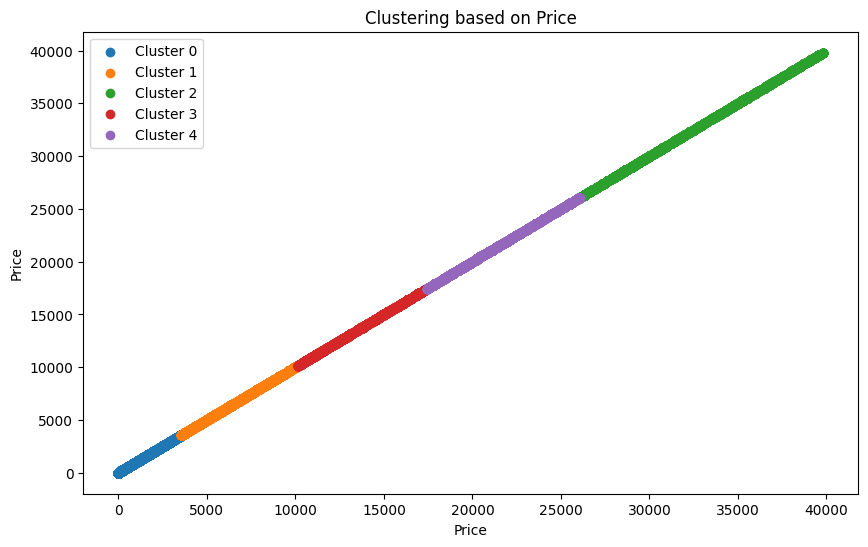

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['price'], cluster_data['price'], label=f'Cluster {cluster_label}')

plt.xlabel('Price')
plt.ylabel('Price')  # Use your actual y-axis label
plt.title('Clustering based on Price')
plt.legend()
plt.show()


#**Classification**

In [ ]:
!pip install lime

In [ ]:
df["status"].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', 'processing', 'payment_review'],
      dtype=object)

In [ ]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Day', 'Payment_method_encoded',
       'category_name_1_encoded', 'status_encoded', 'discount_percentage',
       'cluster'],
      dtype='object')

**X and Y for classification**

In [ ]:
features = ['price', 'qty_ordered', 'category_name_1_encoded', 'discount_amount', 'Year', 'Month', 'Customer ID']
target = 'status'

In [ ]:
X = df[features]
y = df[target]

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.metrics import accuracy_score

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the cross-validated accuracy scores
cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

# Get the index of the model with the highest accuracy
best_model_index = cv_scores.argmax()

# Initialize and train the best model on the entire dataset
best_model = DecisionTreeClassifier(random_state=42)
best_model.fit(X, y)

# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)

# Show the accuracy of the best model
best_model_accuracy = cv_scores[best_model_index]
print("Accuracy of Best Model:", best_model_accuracy)

Cross-validated Accuracy Scores: [0.75399399 0.75406409]
Accuracy of Best Model: 0.7540640908510033


**Accuracy**

In [ ]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7678373030064611


**Checking new prediction**

In [ ]:
category_options = {0: 'Appliances', 1: 'Beauty & Grooming', 2: 'Books', 3: 'Computing', 4: 'Entertainment',
                    5: 'Health & Sports', 6: 'Home & Living', 7: 'Kids & Baby', 8: "Men's Fashion",
                    9: 'Mobiles & Tablets', 10: 'Others', 11: 'School & Education', 12: 'Soghaat',
                    13: 'Superstore', 14: "Women's Fashion", 15: '\\N'}

# Input new instance values from the user
new_instance = {}
for feature in features:
    if feature == 'category_name_1_encoded':
        print("Category options:")
        for code, category in category_options.items():
            print("{}: {}".format(code, category))
        category_code = input("Enter category code: ")
        while not category_code.isdigit() or int(category_code) not in category_options:
            print("Invalid category code. Please enter a valid code.")
            category_code = input("Enter category code: ")
        new_instance[feature] = int(category_code)
    else:
        value = input("Enter value for {}: ".format(feature))
        new_instance[feature] = value

# Convert the new instance into a DataFrame
new_instance_df = pd.DataFrame([new_instance])

# Make prediction using the trained classifier
predicted_status = clf.predict(new_instance_df)

print("Predicted Status:", predicted_status)


Enter value for price: 6556
Enter value for qty_ordered: 3
Category options:
0: Appliances
1: Beauty & Grooming
2: Books
3: Computing
4: Entertainment
5: Health & Sports
6: Home & Living
7: Kids & Baby
8: Men's Fashion
9: Mobiles & Tablets
10: Others
11: School & Education
12: Soghaat
13: Superstore
14: Women's Fashion
15: \N
Enter category code: 3
Enter value for discount_amount: 55
Enter value for Year: 2020
Enter value for Month: 7
Enter value for Customer ID: 2
Predicted Status: ['received']


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[     0      0      0      0      0      0      0      2      0      0
       0      0      0      0      0]
 [     0  27011     15     86   7909      0      5   1878     36      3
       1      0      1   2824    271]
 [     0     29     27      0     22      0      0      9      0      0
       0      0      0      4      1]
 [     0    100      0    207     97      0      0     55      2      0
       1      0      0    115      7]
 [     0  10728     36    107 121942      0      3   3755     34      0
       2      1      0   2510    514]
 [     0      2      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      2      0      0      0      0      1      0      0      0
       0      0      0      0      0]
 [     1   2677      9     58   3967      0      0   4025      4      0
       0      1      0   1165    149]
 [     0     90      0      3     24      0      0     12     74      0
       0      0      0     26 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Classification Report:
                precision    recall  f1-score   support

            \N       0.00      0.00      0.00         2
      canceled       0.60      0.67      0.63     40040
        closed       0.30      0.29      0.30        92
           cod       0.37      0.35      0.36       584
      complete       0.89      0.87      0.88    139632
         fraud       0.00      0.00      0.00         2
        holded       0.11      0.33      0.17         3
order_refunded       0.36      0.33      0.35     12056
          paid       0.40      0.31      0.35       235
payment_review       0.36      0.36      0.36        11
       pending       0.17      0.12      0.14         8
pending_paypal       0.00      0.00      0.00         2
    processing       0.75      0.43      0.55         7
      received       0.52      0.48      0.50     15432
        refund       0.23      0.21      0.22      1609

      accuracy                           0.77    209715
     macro avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Precison,Recall,Accuracy,F1**

In [ ]:
# Compute classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Classification Report:
                precision    recall  f1-score   support

            \N       0.00      0.00      0.00         2
      canceled       0.60      0.67      0.63     40040
        closed       0.30      0.29      0.30        92
           cod       0.37      0.35      0.36       584
      complete       0.89      0.87      0.88    139632
         fraud       0.00      0.00      0.00         2
        holded       0.11      0.33      0.17         3
order_refunded       0.36      0.33      0.35     12056
          paid       0.40      0.31      0.35       235
payment_review       0.36      0.36      0.36        11
       pending       0.17      0.12      0.14         8
pending_paypal       0.00      0.00      0.00         2
    processing       0.75      0.43      0.55         7
      received       0.52      0.48      0.50     15432
        refund       0.23      0.21      0.22      1609

      accuracy                           0.77    209715
     macro avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'linear', 'poly', 'sigmoid', etc.

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Create a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Print the evaluation metrics
print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-score:", f1_svm)
print("\nSVM Confusion Matrix:")
print(cm_svm)

# Generate and print the classification report
report_svm = classification_report(y_test, y_pred_svm)
print("\nSVM Classification Report:")
print(report_svm)


**Logistic Regression Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Logistic Regression classifier
logreg_clf = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_logreg = logreg_clf.predict(X_test)

# Evaluate the classifier
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
# Calculate metrics with 'macro' average
precision_macro = precision_score(y_test, y_pred_logreg, average='macro')
recall_macro = recall_score(y_test, y_pred_logreg, average='macro')
f1_macro = f1_score(y_test, y_pred_logreg, average='macro')

# Print metrics with 'macro' average
print("Logistic Regression Precision (Macro):", precision_macro)
print("Logistic Regression Recall (Macro):", recall_macro)
print("Logistic Regression F1-score (Macro):", f1_macro)

# Create a confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
# Print the evaluation metrics
print("----------------------------------------------")
print("Logistic Regression Accuracy:", accuracy_logreg)
print("----------------------------------------------")

# Generate and print the classification report
report_logreg = classification_report(y_test, y_pred_logreg)
print("\nLogistic Regression Classification Report:")
print(report_logreg)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Logistic Regression Precision (Macro): 0.11859688138381799
Logistic Regression Recall (Macro): 0.07864817580402346
Logistic Regression F1-score (Macro): 0.07485856611633582
----------------------------------------------
Logistic Regression Accuracy: 0.68363254893546
----------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Logistic Regression Classification Report:
                precision    recall  f1-score   support

            \N       0.00      0.00      0.00         2
      canceled       0.69      0.07      0.13     40040
        closed       0.00      0.00      0.00        92
           cod       0.00      0.00      0.00       584
      complete       0.69      0.99      0.81    139632
         fraud       0.00      0.00      0.00         2
        holded       0.00      0.00      0.00         3
order_refunded       0.00      0.00      0.00     12056
          paid       0.00      0.00      0.00       235
payment_review       0.00      0.00      0.00        11
       pending       0.00      0.00      0.00         8
pending_paypal       0.00      0.00      0.00         2
    processing       0.00      0.00      0.00         7
      received       0.40      0.11      0.18     15432
        refund       0.00      0.00      0.00      1609

      accuracy                           0.68    209715
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**MLP Neural Network Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the MLP classifier with desired parameters
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the classifier on the training data
mlp_clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate the classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='macro')  # Use 'macro' for multiclass
recall_mlp = recall_score(y_test, y_pred_mlp, average='macro')
f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')

# Create a confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Print the evaluation metrics
print("MLP Accuracy:", accuracy_mlp)
print("MLP Precision:", precision_mlp)
print("MLP Recall:", recall_mlp)
print("MLP F1-score:", f1_mlp)

# Generate and print the classification report
report_mlp = classification_report(y_test, y_pred_mlp)
print("\nMLP Classification Report:")
print(report_mlp)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



MLP Accuracy: 0.665817895715614
MLP Precision: 0.04438785971437427
MLP Recall: 0.06666666666666667
MLP F1-score: 0.05329257156924204

MLP Confusion Matrix:
[[     0      0      0      0      2      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0  40040      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0     92      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0    584      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0 139632      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      2      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      3      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0  12056      0      0      0      0      0
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




MLP Classification Report:
                precision    recall  f1-score   support

            \N       0.00      0.00      0.00         2
      canceled       0.00      0.00      0.00     40040
        closed       0.00      0.00      0.00        92
           cod       0.00      0.00      0.00       584
      complete       0.67      1.00      0.80    139632
         fraud       0.00      0.00      0.00         2
        holded       0.00      0.00      0.00         3
order_refunded       0.00      0.00      0.00     12056
          paid       0.00      0.00      0.00       235
payment_review       0.00      0.00      0.00        11
       pending       0.00      0.00      0.00         8
pending_paypal       0.00      0.00      0.00         2
    processing       0.00      0.00      0.00         7
      received       0.00      0.00      0.00     15432
        refund       0.00      0.00      0.00      1609

      accuracy                           0.67    209715
     macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
pip install wikipedia-api


In [ ]:
import requests

def search_wikipedia(query):
    # Wikipedia API endpoint URL
    url = "https://en.wikipedia.org/w/api.php"

    # Parameters for the API request
    params = {
        "action": "query",
        "format": "json",
        "titles": query,
        "prop": "extracts",
        "exintro": True,
        "explaintext": True
    }

    # Set custom user agent
    headers = {
        "User-Agent": "MyCoolApp/1.0"
    }

    # Make the API request
    response = requests.get(url, params=params, headers=headers)
    data = response.json()

    # Extract page content from the response
    pages = data["query"]["pages"]
    if pages:
        page_id = next(iter(pages))
        page_data = pages[page_id]
        title = page_data["title"]
        if "extract" in page_data:
            summary = page_data["extract"]
            print("Title:", title)
            print("Summary:")
            print(summary)
        else:
            print("Summary not available.")
    else:
        print("Page not found.")

# Take input from the user
user_input = input("Enter your search query: ")

# Call the search_wikipedia function with user input
search_wikipedia(user_input)


Enter your search query: data mining
Title: Data mining
Summary:
Data mining is the process of extracting and discovering patterns in large data sets involving methods at the intersection of machine learning, statistics, and database systems. Data mining is an interdisciplinary subfield of computer science and statistics with an overall goal of extracting information (with intelligent methods) from a data set and transforming the information into a comprehensible structure for further use. Data mining is the analysis step of the "knowledge discovery in databases" process, or KDD. Aside from the raw analysis step, it also involves database and data management aspects, data pre-processing, model and inference considerations, interestingness metrics, complexity considerations, post-processing of discovered structures, visualization, and online updating.The term "data mining" is a misnomer because the goal is the extraction of patterns and knowledge from large amounts of data, not the extr